Notebook to determine the effect of ln_apr_obc=true

NEMO says this addes the inverse barometer to open boundary forcing. I don't think we should do that.

In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt

from salishsea_tools import stormtools, places
import datetime

from nowcast.figures import figures

%matplotlib inline

# NEMO 36

In [2]:
sshs ={}
times={}
runs = ['obc', 'no_obc']
for run in runs:
    f = nc.Dataset('/ocean/nsoontie/MEOPAR/SalishSea/results/test_obc/{}/PointAtkinson_10.nc'.format(run))
    sshs[run] = f.variables['sossheig']
    times[run] = nc.num2date(f.variables['time_counter'][:], f.variables['time_counter'].units)

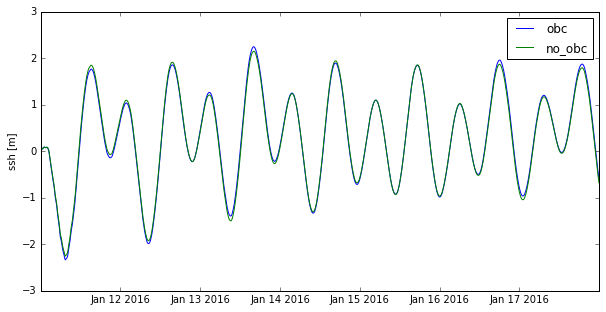

In [3]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
for run in runs:
    ax.plot(times[run], sshs[run][:,0,0], label=run)
ax.legend(loc=0)
ax.set_ylabel('ssh [m]')

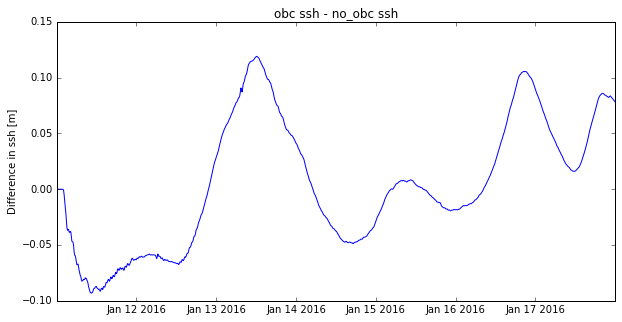

In [4]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
diff = sshs['obc'][:,0,0] - sshs['no_obc'][:,0,0]
ax.plot(times[run], diff)
ax.set_ylabel('Difference in ssh [m]')
ax.set_title('obc ssh - no_obc ssh')

In [5]:
to=datetime.datetime(2016,1,11)
tf= datetime.datetime(2016,1,17)
wind, direc, t, pr, tem, sol, the, qr, pre = figures.get_model_winds(
                                                places.PLACES['Point Atkinson']['lon lat'][0],
                                                places.PLACES['Point Atkinson']['lon lat'][1],
                                                to,tf,
                                                '/results/forcing/atmospheric/GEM2.5/operational/')

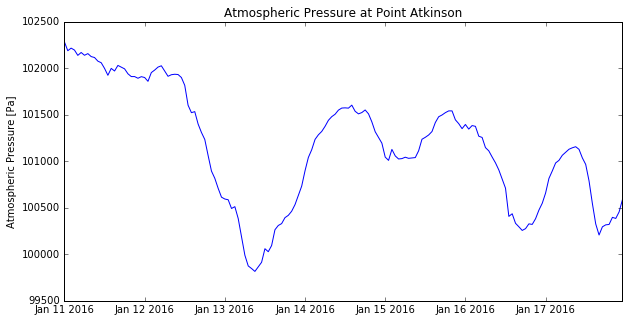

In [6]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(t,pr)
ax.set_ylabel('Atmospheric Pressure [Pa]')
ax.set_title('Atmospheric Pressure at Point Atkinson')

In [7]:
g=9.81
rho0=1035
P0=101000
ssh_ib = -1/(g*rho0)*(pr -P0)

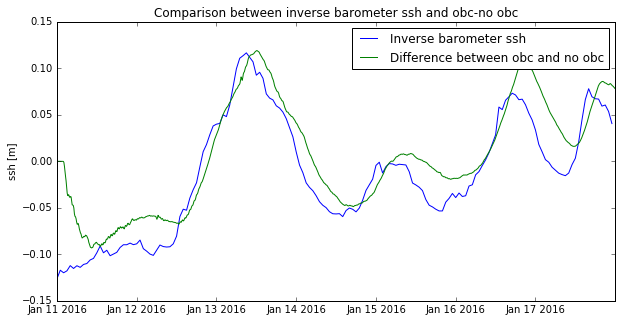

In [8]:
fig,ax=plt.subplots(1,1,figsize=(10,5))
ax.plot(t, ssh_ib,label='Inverse barometer ssh')
ax.plot(times[run], diff, label='Difference between obc and no obc')
ax.set_ylabel('ssh [m]')
ax.legend()
ax.set_title('Comparison between inverse barometer ssh and obc-no obc')